##Image Segmentation Over View 

Semantic Segmentation

* Each object is labeled with their own class (example people go to people and table goes to table)

Instance segmentation 

* Each object is an instance of the same class (each person and each table is an instance of foreground)

##Architecture 

The highlevel architecture for an image segmentation algo is an encoder-decoder one

It works by taking an input image which has a set of dimensions `(100 x 100 x 3)` (3 for RGB) and processing that image through an `encoder`.

* An `encoder` is a feature extractor that typically uses a CNN to extract features
* It extracts features from the image onto a feature map
 *  The earlier layers extract low level features such as lines and these lower level features are successfully aggregated into higher level features such as eyes and ears.
* The aggregation of higher level features is accomplished through downsampling
 * Downsampling is what happends when the computer tries to represent an image with fewer pixels


Where a typical CNN would have dense layers to do a classification based on the learned features, the image segmentation architecture will take the downsampled feature map and feed it to a `decoder`
* The `decoder` takes the features that were extracted by the `encoder` and works on producing the models output (prediction)
* The `decoder` is also a CNN 
* It assigns intermediate labels to the to the pixels in the feature map and then upsamples the image to slowly add back the fine grained details of the original image. 
 * It repeats this process until the images are sampled back up to their original dimensions


The final predicted image also has the final class labels assigned to each pixel 

##Popular Architectures in Image Segmentation

Full CNN's (FCN)

* Goal 
  * Replace the fully-connected layers and typical CNNs with convolutional layers that act as the decoder layers to upscale the image and create the pixel-wise label map
* Fully convolutional neural network encoders are feature extractors
 * This means that the layers of popular object detection models can be reused as encoders (ResNet50, VGG16, MobileNet)
* The decoder part of the FCN is usually called FCN-32, FCN-16, FCN-8, etc.
 * The numbers refer to the stride size during upsampling 
 * The smaller the stride, the more detailed the processing but also the longer the process will be to fully upscale theimage
* Difference between encoder and decoder architecture 
 * The main difference is the resolution of the final pixel map


SegNet

* Very similar to an FCN but the encoder layers are symmetric with the decoder layers and mirror each other.


U-Net
* Also symetric 


Mask R-CNN
* Also popular for image segmentation 
* Builds off of the `Faster R-CNN` to perform upsampling
 * It turns the object detection model into an image segmentation model 

##Upsampling Methods

Simple Scaling: `UpSampling2D`
* Nearest
 * Copies values from nearest pixel
* Bilinear
 * Linear interpolation from nearby pixels giving average of nearby pixels 

Transposed Convolution (Reverse of a Convolution): `Conv2DTranspose`



##U-Net

U-Net was developed for biomedical image segmentation and is also an FCN 

The key difference is is that in addition to the upsampling path, "skip" connections between the encoder and the decoder are used. 
* The skip connections are skip the rest of the model to the other end of the model to their mirrored counter parts 

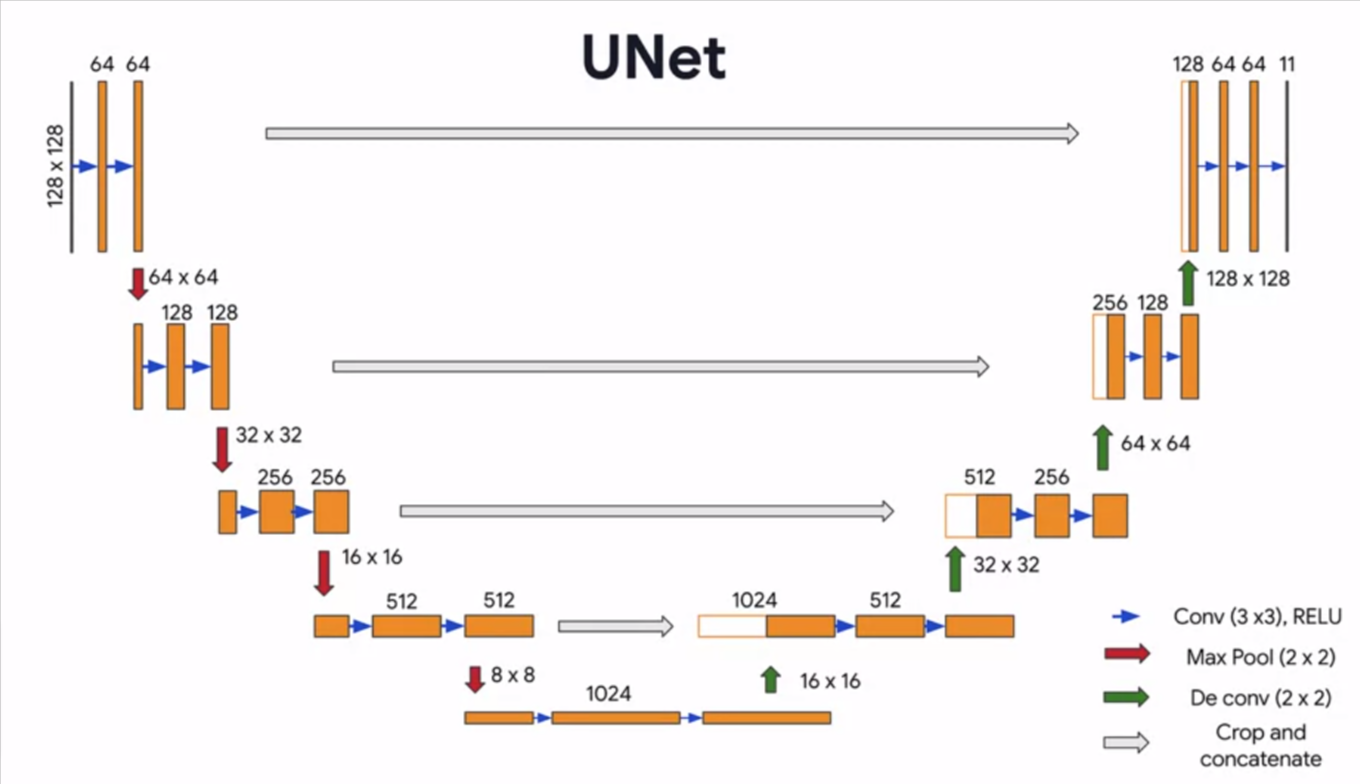

Notice how the first layer is at the top with each subsequent layer dropping during the encoding part of the model before coming up again during the decoding section



Encoder 
* This is the left-hand side of the U
* There isn't anything different from typical FCN encoders
 * An image that is fed in as a `128 x 128` will pass through two convolutional layers that have 64 filters each
 * The subsequent images when pooled will be `64 x 64` because the MaxPooling layers have a `2 x 2` filter and a stride of `2 x 2` so each pass will 'halve' the image
 * By the end of the encoding process, the image will go from `128 x 128` to `8 x 8` blocks

The Bottle Neck
* This is a simple convolutional layer that comes after the encoder
* It doesn't have a MaxPooling layer after it and it serves as a bridge between the encoder and decoder 

Decoder
* The decoder is on the right-hand side of the U
* Starting from the bottom, the 5th level with the `8 x 8` blocks get up-sampled to 16 by 16 and so on 
 * Here the model is slowly adding back the fine grain detail of the image (although there will of course be data loss)
* The filters of the encoder and decoder on the 5th level will be concatenated for a total of 1024 filters 
 * These 1024 filters will be passed through two convolutional layers before being de-convoluted through a `Conv2DTranspose` layer
* Notice how at each level there is an additional concatenation from the skip layers from the encoding section of the model 
 * The layers are joinded together before being de-convoluted again and repeating the whole process

Output
* The output segmentation map is obtained by performing a `1 x 1` convolution with the filters equal to the number of classes on the output of the final stage 
 * Note that you can have your model predict multiple classes
  * A `1 x 1` convolution will output a single value 
  * 11 `1 x 1` convolution filters will lead the model to output 11 predictions (one for each class assuming there are 11 classes)

##Mask R-CNN
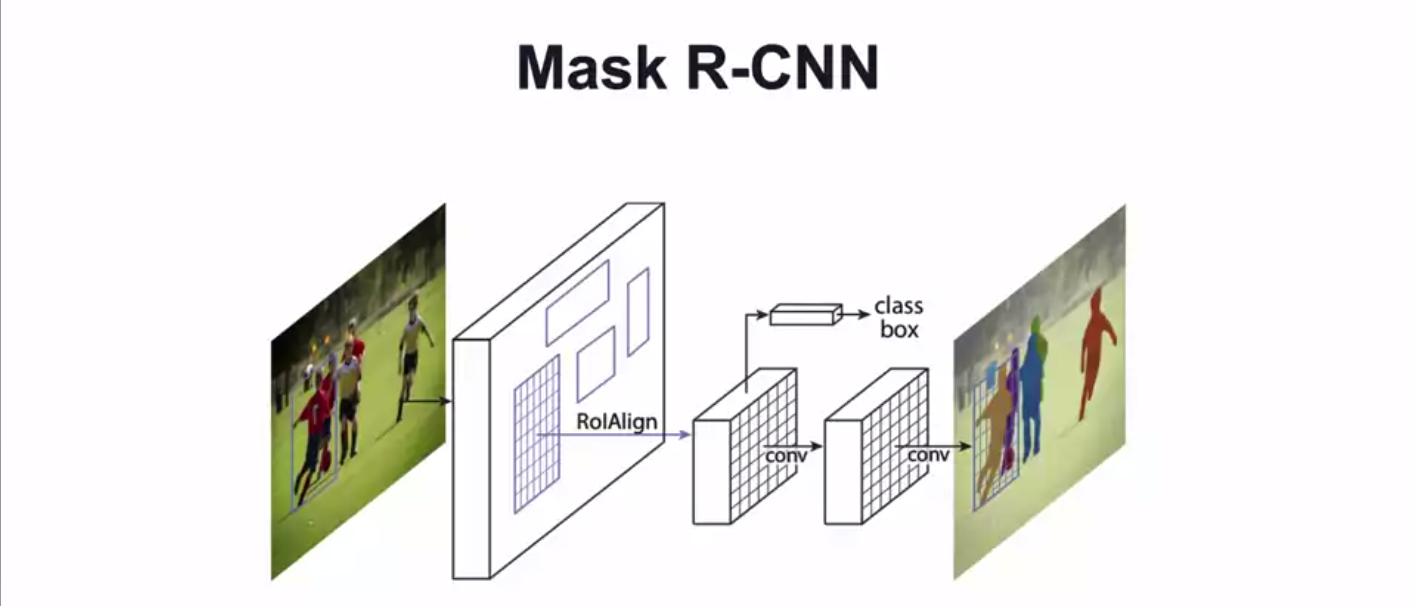

One of the common tasks of image segmentation is to perfom the detection of individual classes while also separating them into distinct examples. 

Mask R-CNN is a model developed by Facebook Research that can be used to run inference to get segmented boxes overlayed on an image. Image segmentation doesn't just generate the segmentation maps, but finds out how many instances of each kind of object that's been identified will appear in the scence. 
* The resulting predictions are overlaid on the sample image as boxes, instant masks, and labels. 

It's possible to segment an image by both detecting and segmenting multiple objects within a single image
* Mask R-CNN acomplishes this using a two stage pipeline:
 * The First stage involves generating region proposals for objects in the image using a technique called region of interest align (ROI).
 * The Second stage then predicts the class of the object within the bounding boxes as well as the pixel level mask based on the predicted class within the bounding object.

There are two convolutional layers:
* The first is similar to ResNet, Inception, or feature extraction
* The second is the final feature map used in classifying the pixels within the segments. 

NOTE: This model is extremely expensive to train due to its complexity, however there are pre-trained models that can be further fine tuned for specific data 
